In [21]:
import pandas as pd


df_experiment = pd.read_csv("C:/Users/49151/Downloads/df_final_experiment_clients.txt")


In [22]:
df_web1 = pd.read_csv("C:/Users/49151/Downloads/df_final_web_data_pt_1.txt")
df_web2 = pd.read_csv("C:/Users/49151/Downloads/df_final_web_data_pt_2.txt")


In [23]:
# Check the first few rows of each DataFrame to understand their structure
print("Shape of Part 1:", df_web1.shape)
print("Shape of Part 2:", df_web2.shape)


print("Columns in Part 1:", df_web1.columns.tolist())
print("Columns in Part 2:", df_web2.columns.tolist())



Shape of Part 1: (343141, 5)
Shape of Part 2: (412264, 5)
Columns in Part 1: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']
Columns in Part 2: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']


In [24]:
df_web = pd.concat([df_web1, df_web2], ignore_index=True)



In [25]:
df_demo = pd.read_csv("C:/Users/49151/Downloads/df_final_demo.txt")

In [26]:
# Overview of each dataset
print("Web Data Shape:", df_web.shape)
print("Demo Data Shape:", df_demo.shape)
print("Experiment Clients Shape:", df_experiment.shape)

# Data types and nulls
print(df_web.info())
print(df_demo.info())
print(df_experiment.info())


Web Data Shape: (755405, 5)
Demo Data Shape: (70609, 9)
Experiment Clients Shape: (70609, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5 

In [27]:
# Change date_time to datetime format
df_web['date_time'] = pd.to_datetime(df_web['date_time'])


In [28]:
df_demo.isnull().sum()


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [29]:
df_demo_clean = df_demo.dropna()
print("Cleaned demo shape:", df_demo_clean.shape)


Cleaned demo shape: (70594, 9)


In [30]:
# Remove clients who were not part of the A/B test
df_experiment_clean = df_experiment.dropna(subset=['Variation'])


In [31]:
# Step 1: Merge experiment with demo data
df_exp_demo = pd.merge(df_experiment_clean, df_demo_clean, on='client_id', how='inner')

# Step 2: Merge that with web data
df_full = pd.merge(df_exp_demo, df_web, on='client_id', how='inner')

print("Final merged dataset shape:", df_full.shape)
df_full.head()


Final merged dataset shape: (321195, 14)


,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Text(0.5, 1.0, 'Gender Distribution')

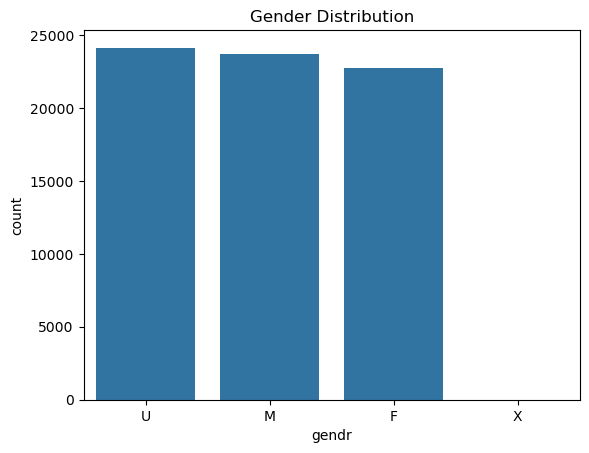

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution
sns.countplot(x='gendr', data=df_demo_clean)
plt.title('Gender Distribution')


Text(0.5, 0, 'Age')

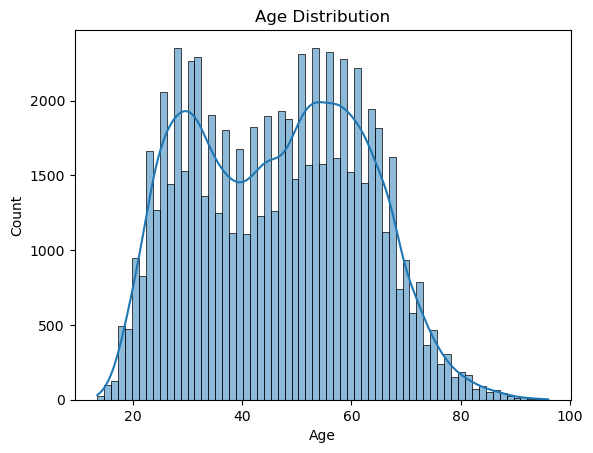

In [34]:

# Age distribution
sns.histplot(df_demo_clean['clnt_age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')


Text(0.5, 1.0, 'Number of Accounts per Client')

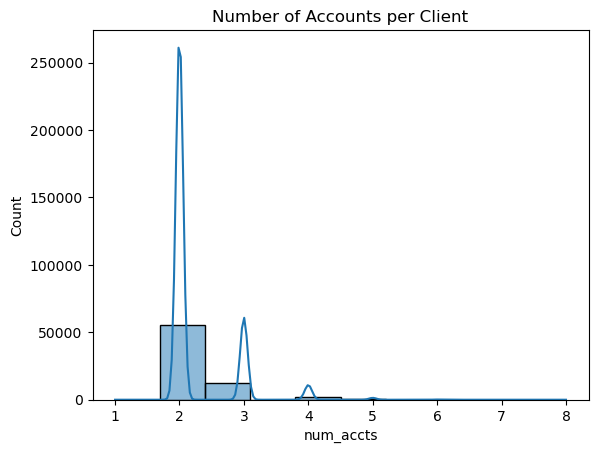

In [35]:

# Account distribution
sns.histplot(df_demo_clean['num_accts'], bins=10, kde=True)
plt.title('Number of Accounts per Client')


Text(0.5, 0, 'Balance')

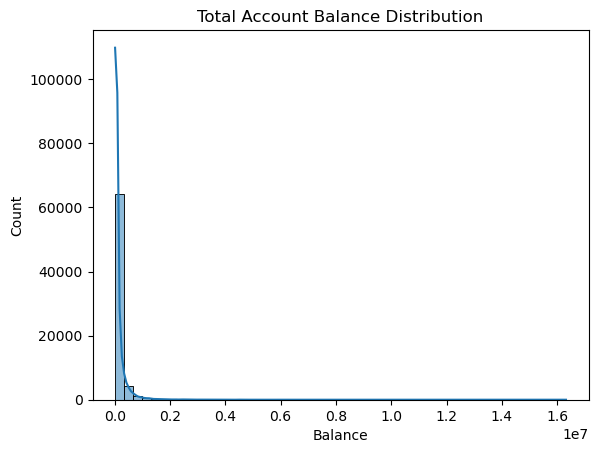

In [36]:

# Balance distribution
sns.histplot(df_demo_clean['bal'], bins=50, kde=True)
plt.title('Total Account Balance Distribution')
plt.xlabel('Balance')


Text(0.5, 1.0, 'Tenure by Group (Years)')

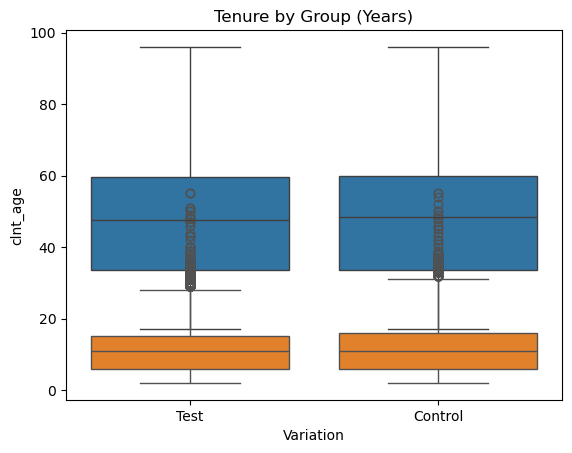

In [37]:
# Age & tenure analysis
sns.boxplot(x='Variation', y='clnt_age', data=df_exp_demo)
plt.title('Age by Group')

sns.boxplot(x='Variation', y='clnt_tenure_yr', data=df_exp_demo)
plt.title('Tenure by Group (Years)')


In [38]:
# Grouping
age_groups = pd.cut(df_demo_clean['clnt_age'], bins=[0, 30, 45, 60, 90], labels=['<30', '30-45', '45-60', '60+'])
tenure_groups = pd.cut(df_demo_clean['clnt_tenure_yr'], bins=[0, 1, 5, 10, 40], labels=['<1yr', '1-5yr', '5-10yr', '10+yr'])

print(age_groups.value_counts())
print(tenure_groups.value_counts())


clnt_age
45-60    22087
30-45    18982
60+      15460
<30      14024
Name: count, dtype: int64
clnt_tenure_yr
10+yr     36125
5-10yr    22223
1-5yr     12172
<1yr          0
Name: count, dtype: int64


In [39]:
step_counts = df_web['process_step'].value_counts().sort_index()
print(step_counts)


process_step
confirm    102963
start      243945
step_1     163193
step_2     133062
step_3     112242
Name: count, dtype: int64


In [40]:
steps_per_client = df_web.groupby('client_id')['process_step'].nunique()
steps_per_client.describe()


count    120157.000000
mean          4.103981
std           1.447308
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: process_step, dtype: float64

In [41]:
completed_clients = df_web[df_web['process_step'] == 'confirmation_page']['client_id'].unique()
df_exp_demo['completed'] = df_exp_demo['client_id'].isin(completed_clients)


Text(0.5, 1.0, 'Completion Rate by Group')

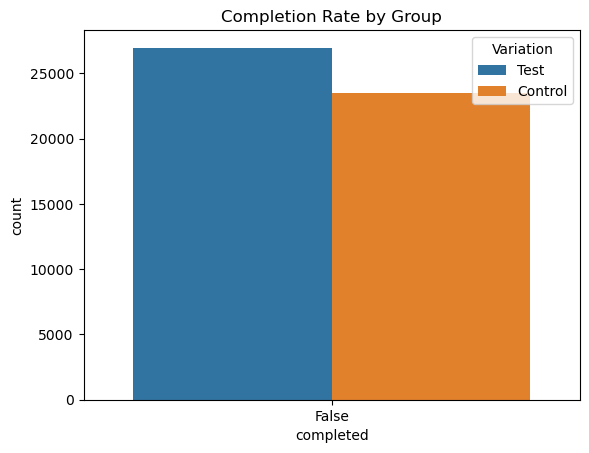

In [42]:
sns.countplot(x='completed', hue='Variation', data=df_exp_demo)
plt.title('Completion Rate by Group')


In [43]:
completed_ids = df_web[df_web['process_step'] == 'confirmation_page']['client_id'].unique()
df_full['completed'] = df_full['client_id'].isin(completed_ids)


Text(0, 0.5, 'Logons (6 Months)')

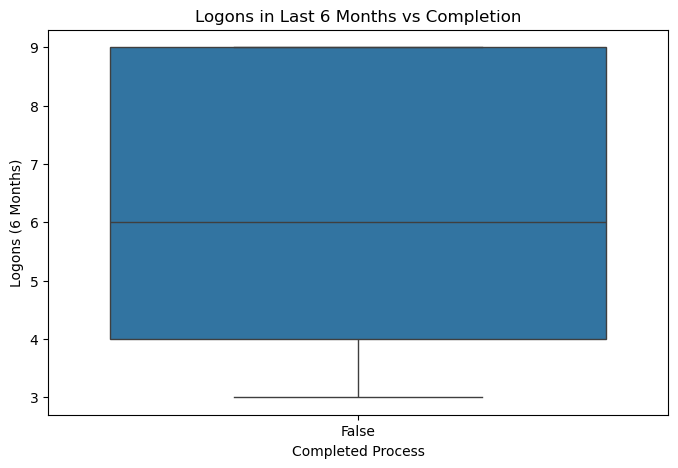

In [44]:
# Boxplot of logons by completion status
plt.figure(figsize=(8, 5))
sns.boxplot(x='completed', y='logons_6_mnth', data=df_full)
plt.title('Logons in Last 6 Months vs Completion')
plt.xlabel('Completed Process')
plt.ylabel('Logons (6 Months)')

Text(0, 0.5, 'Calls (6 Months)')

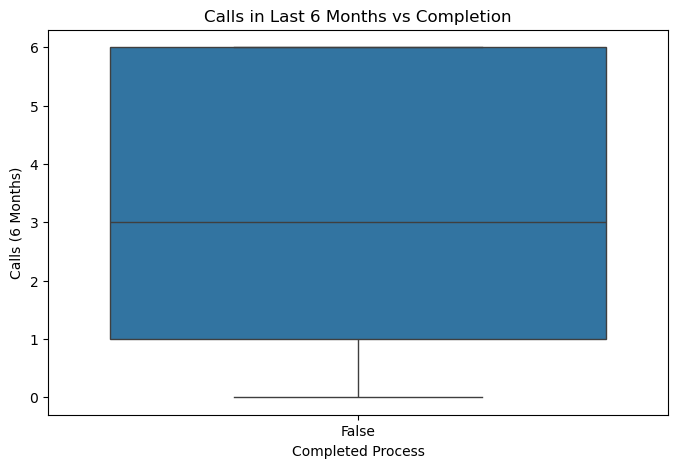

In [45]:
# Boxplot of calls by completion
plt.figure(figsize=(8, 5))
sns.boxplot(x='completed', y='calls_6_mnth', data=df_full)
plt.title('Calls in Last 6 Months vs Completion')
plt.xlabel('Completed Process')
plt.ylabel('Calls (6 Months)')


In [46]:
steps_by_client = df_web.groupby('client_id')['process_step'].nunique().reset_index()
steps_by_client.columns = ['client_id', 'steps_completed']

# Merge with balance data
balance_vs_steps = pd.merge(steps_by_client, df_demo_clean[['client_id', 'bal']], on='client_id')


Text(0, 0.5, 'Total Balance ($)')

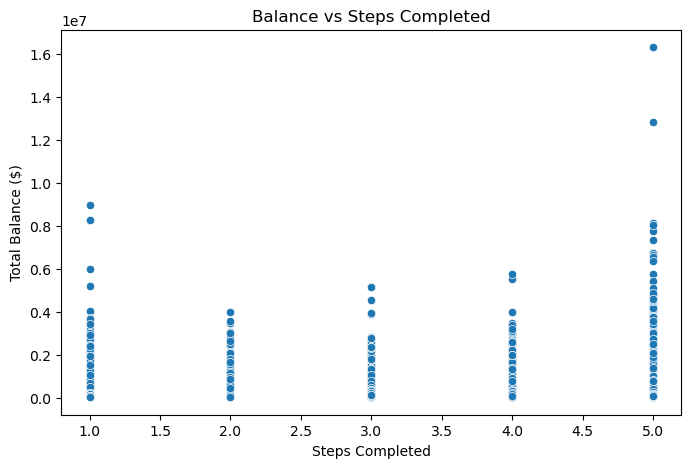

In [47]:
# Scatterplot or regression
plt.figure(figsize=(8, 5))
sns.scatterplot(x='steps_completed', y='bal', data=balance_vs_steps)
plt.title('Balance vs Steps Completed')
plt.xlabel('Steps Completed')
plt.ylabel('Total Balance ($)')
